# LOGISTIC REGRESSION

## dataset of sign language digits. 

dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

                

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
from sklearn.metrics import r2_score
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
x_l = np.load("X.npy") # image
y_l = np.load("Y.npy") # label

#### 1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. 

#### Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.

In [3]:
y_l = np.argmax(y_l, axis=1)

max_ele = np.max(x_l)
min_ele = np.min(x_l)

x_l = ((x_l-min_ele)/(max_ele-min_ele)).reshape([x_l.shape[0], x_l.shape[1]* x_l.shape[2]])

X_train, X_test, Y_train, Y_test = train_test_split(x_l, y_l, test_size=0.30)

#### 2. Plot a diagram for the sigmoid function. 


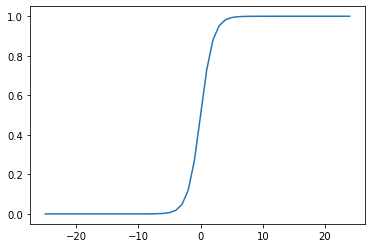

In [4]:
x_sigmoid = range(-25,25)
y_sigmoid = []

for i in x_sigmoid:
    y_sigmoid.append(1 / (1 + np.exp(-i)))

plt.plot(x_sigmoid, y_sigmoid)
plt.show()

#### This is used for binary classication. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.

### Binary classification vs. Multi-class classification

#### Binary Classification
- thare are only two class present in the dataset 
- This kind of data require only one classifier to classify
- Accuracy and Confusion Matrixare easy to derive and understand as there are only classes are present.

Example:- Check person will servive or not from the titanic dataset


#### Multi-class Classification
- More than two classeswill be there in the dataset
- Claasification model will be depend on claasification technique
	- one vs one: n*(n-1)/2
	- one vs all: n

- Accuracy and Confusion Matrixare easy to derive,butit is difficult understand as there are only classes are present.
- Example: Predicting animal as dog or cat or lion or tiger

#### one-vs-All 
- If there are N classes present then will make N model by selecting one class vs all other classes as one class
- we'll make sure one class will be given value as 1.


- For Green vs Blue vs Red exaple

- Classifier 1:- [Green] vs [Red, Blue]
- Classifier 2:- [Blue] vs [Green, Red]
- Classifier 3:- [Red] vs [Blue, Green]

###### Classification:

- binary classifier models predict the probability of correspondence with concerning classes
- Final class will be, the class in which we get highest accuracy among those N binary model.

#### one-vs-one 
- If there are N classes present then will make N*(N-1) model by selecting each pair from that N classes.

- For Green vs Blue vs Red vs White

- Classifier 1:- [Green] vs [Blue]
- Classifier 2:- [Green] vs [Red]
- Classifier 3:- [Green] vs [White]
- Classifier 4:- [Blue] vs [Red]
- Classifier 5:- [Blue] vs [White]
- Classifier 6:- [Red] vs [White]

##### Classification:

- for each data point, we'll classify with all model.
- Then we'll sum the class prediction for that data point
- And final data point is classifies to the class which has highest count among them

#### 3. Use both one vs all and one vs one method for the above problem statement purpose.


#### One vs All

In [5]:
class one_vs_all:
    def __init__(self, total_features, total_classes, bias=True):
        
        self.total_features = total_features
        self.bias = bias
        if self.bias==True:
            self.total_features += 1

        self.total_classes = total_classes

        self.weights = np.ones(self.total_features*self.total_classes).reshape((self.total_classes,self.total_features,1))

    def save_weights(self):
        file_name = "weights_ova.npy"
        with open(file_name, 'wb') as f:
            np.save(f, self.weights)
    
    def load_weights(self):
        file_name = "weights_ova.npy"
        with open(file_name, 'rb') as f:
            self.weights = np.load(f)

    def train(self, X_train, Y_train, Transfer_learning=False, epoch=5000, alpha=0.01):

        self.epoch = epoch
        self.alpha = alpha

        if Transfer_learning == True:
            self.load_weights()   

        # print("\nTrain :: ")

        X_train = np.c_[X_train, np.ones(X_train.shape[0])]
        m = X_train.shape[0]

        for i in tqdm(range(self.total_classes)):
            # print("\n", i, "vs" ,"All:")

            new_Y_train = [1 if Y_train[idx] == i else 0 for idx in range(m)]
            new_Y_train = np.array(new_Y_train)
            new_Y_train = new_Y_train.reshape((-1,1))

            # for _ in tqdm(range(self.epoch)):
            for _ in range(self.epoch):
                
                xw = np.matmul(X_train, self.weights[i])
                neg_xw = -1 * xw

                hw_xw = 1 / (1 + np.exp(neg_xw))
                dj_dw = np.matmul(X_train.T, (hw_xw - new_Y_train))/m
                                
                self.weights[i] = self.weights[i] - (self.alpha*dj_dw)  

        self.save_weights()        

    def test(self, X_test, Y_test):
        # print("\nTest :: ")

        X_test = np.c_[X_test, np.ones(X_test.shape[0])]
        m = X_test.shape[0]

        class_percent = []

        for i in tqdm(range(self.total_classes)):         
            xw = np.matmul(X_test, self.weights[i])
            neg_xw = -1 * xw

            hw_xw = 1 / (1 + np.exp(neg_xw))
            
            class_percent.append(hw_xw)

        class_percent = np.array(class_percent).T.reshape([m,self.total_classes])
        Y_pred = np.argmax(class_percent, axis=1)

        true_count = 0
        for i in range(m):
            if Y_pred[i] == Y_test[i]:
                true_count += 1
        
        accu = true_count/ m
        return accu, confusion_matrix(Y_test, Y_pred), classification_report(Y_test, Y_pred)

#### One vs One

In [6]:
class one_vs_one:
    def __init__(self, total_features, total_classes, bias=True):
        
        self.total_features = total_features
        self.bias = bias
        if self.bias==True:
            self.total_features += 1

        self.total_classes = total_classes

        count = int((self.total_classes * (self.total_classes-1))/2)
        self.weights = np.ones(self.total_features*count).reshape((count,self.total_features,1))

    def save_weights(self):
        file_name = "weights_ovo.npy"
        with open(file_name, 'wb') as f:
            np.save(f, self.weights)
    
    def load_weights(self):
        file_name = "weights_ovo.npy"
        with open(file_name, 'rb') as f:
            self.weights = np.load(f)

    def train(self, X_train, Y_train, Transfer_learning=False, epoch=5000, alpha=0.01):

        self.epoch = epoch
        self.alpha = alpha

        if Transfer_learning == True:
            self.load_weights()   

        # print("\nTrain :: ")

        X_train = np.c_[X_train, np.ones(X_train.shape[0])]
        total_count = X_test.shape[0]

        weight_idx = 0

        for i in tqdm(range(self.total_classes)):
            for j in range(i+1, self.total_classes):
                # print("\n", i, "vs" , j ,"::")

                new_X_train = [X_train[idx] for idx in range(total_count) if (Y_train[idx] == i or Y_train[idx] == j)]
                new_X_train = np.array(new_X_train)
                
                m = new_X_train.shape[0]

                new_Y_train = [Y_train[idx] for idx in range(total_count) if (Y_train[idx] == i or Y_train[idx] == j)]
                 
                new_Y_train = [1 if new_Y_train[idx] == i else 0 for idx in range(m)]
                new_Y_train = np.array(new_Y_train)
                new_Y_train = new_Y_train.reshape((-1,1))

                # for _ in tqdm(range(self.epoch)):
                for _ in range(self.epoch):
                    
                    xw = np.matmul(new_X_train, self.weights[weight_idx])
                    neg_xw = -1 * xw

                    hw_xw = 1 / (1 + np.exp(neg_xw))
                    dj_dw = np.matmul(new_X_train.T, (hw_xw - new_Y_train))/m
                                    
                    self.weights[weight_idx] = self.weights[weight_idx] - (self.alpha*dj_dw)  

                weight_idx += 1

        self.save_weights()        

    def test(self, X_test, Y_test):
        # print("\nTest :: ")

        X_test = np.c_[X_test, np.ones(X_test.shape[0])]
        m = X_test.shape[0]

        class_pred = []

        weight_idx = 0
        for i in tqdm(range(self.total_classes)):
            for j in range(i+1, self.total_classes):   
                
                xw = np.matmul(X_test, self.weights[weight_idx])
                neg_xw = -1 * xw

                hw_xw = 1 / (1 + np.exp(neg_xw))
                
                onevsone_class_pred = [i if hw_xw[idx]>=0.5 else j for idx in range(m)] 
                class_pred.append(onevsone_class_pred)

                weight_idx += 1

        class_pred = np.array(class_pred)        
        Y_pred = stats.mode(class_pred)[0][0]

        true_count = 0
        for i in range(m):
            if Y_pred[i] == Y_test[i]:
                true_count += 1
        
        accu = true_count/ m
        return accu, confusion_matrix(Y_test, Y_pred), classification_report(Y_test, Y_pred)

#### 4. Also get results using Log Reg from scikit learn.


In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
class one_vs_all_sklearn:
    def __init__(self, total_features, total_classes, bias=True):
        
        self.total_features = total_features
        self.bias = bias
        if self.bias==True:
            self.total_features += 1

        self.total_classes = total_classes
        self.clfs = []

    def train(self, X_train, Y_train, Transfer_learning=False, epoch=5000, alpha=0.01):

        self.epoch = epoch
        self.alpha = alpha

        if Transfer_learning == True:
            self.load_weights()   

        # print("\nTrain :: ")

        X_train = np.c_[X_train, np.ones(X_train.shape[0])]
        m = X_train.shape[0]

        for i in tqdm(range(self.total_classes)):

            new_Y_train = [1 if Y_train[idx] == i else 0 for idx in range(m)]
            new_Y_train = np.array(new_Y_train)
            new_Y_train = new_Y_train.reshape((-1,))
                
            clf = LogisticRegression(max_iter=5000).fit(X_train, new_Y_train)
            self.clfs.append(clf)
                
    def test(self, X_test, Y_test):
        # print("\nTest :: ")

        X_test = np.c_[X_test, np.ones(X_test.shape[0])]
        m = X_test.shape[0]

        class_percent = []

        for i in tqdm(range(self.total_classes)):           
            
            temp_hw_xw = self.clfs[i].predict_proba(X_test)
            hw_xw = [temp_hw_xw[i][1] for i in range(len(temp_hw_xw))]
            
            class_percent.append(hw_xw)

        class_percent = np.array(class_percent).T.reshape([m,self.total_classes])
        Y_pred = np.argmax(class_percent, axis=1)

        true_count = 0
        for i in range(m):
            if Y_pred[i] == Y_test[i]:
                true_count += 1
        
        accu = true_count/ m
        return accu, confusion_matrix(Y_test, Y_pred), classification_report(Y_test, Y_pred)

In [9]:
class one_vs_one_sklearn:
    def __init__(self, total_features, total_classes, bias=True):
        
        self.total_features = total_features
        self.bias = bias
        if self.bias==True:
            self.total_features += 1

        self.total_classes = total_classes

        count = int((self.total_classes * (self.total_classes-1))/2)
        self.clfs = []

    def train(self, X_train, Y_train, Transfer_learning=False, epoch=5000, alpha=0.01):

        self.epoch = epoch
        self.alpha = alpha

        if Transfer_learning == True:
            self.load_weights()   

        # print("\nTrain :: ")

        X_train = np.c_[X_train, np.ones(X_train.shape[0])]
        total_count = X_test.shape[0]

        weight_idx = 0

        for i in tqdm(range(self.total_classes)):
            for j in range(i+1, self.total_classes):

                new_X_train = [X_train[idx] for idx in range(total_count) if (Y_train[idx] == i or Y_train[idx] == j)]
                new_X_train = np.array(new_X_train)
                
                m = new_X_train.shape[0]

                new_Y_train = [Y_train[idx] for idx in range(total_count) if (Y_train[idx] == i or Y_train[idx] == j)]
                 
                new_Y_train = [1 if new_Y_train[idx] == i else 0 for idx in range(m)]
                new_Y_train = np.array(new_Y_train)
                new_Y_train = new_Y_train.reshape((-1,))

                clf = LogisticRegression(max_iter=5000).fit(new_X_train, new_Y_train)
                self.clfs.append(clf)

    def test(self, X_test, Y_test):
        # print("\nTest :: ")

        X_test = np.c_[X_test, np.ones(X_test.shape[0])]
        m = X_test.shape[0]

        class_pred = []

        weight_idx = 0
        for i in tqdm(range(self.total_classes)):
            for j in range(i+1, self.total_classes):   
                
                
                hw_xw = self.clfs[weight_idx].predict_proba(X_test)
                hw_xw = np.argmax(hw_xw, axis=1)
                
                onevsone_class_pred = [i if hw_xw[idx]>=0.5 else j for idx in range(m)] 
                class_pred.append(onevsone_class_pred)

                weight_idx += 1
                
        class_pred = np.array(class_pred)        
        Y_pred = stats.mode(class_pred)[0][0]
        
        true_count = 0
        for i in range(m):
            if Y_pred[i] == Y_test[i]:
                true_count += 1
        
        accu = true_count/ m
        
        cm = confusion_matrix(Y_test, Y_pred)
        cr = classification_report(Y_test, Y_pred)
        
        return accu, cm, cr

#### 5. Report accuracy score, Confusion matrix and any other metrics you feel useful and Compare the results - from all the three.


#### ONE VS ONE : OWN ALGO

In [10]:
one_vs_one_obj = one_vs_one(X_train.shape[1], 10)
one_vs_one_obj.train(X_train,Y_train, Transfer_learning=False, epoch=50000, alpha=0.01)

100%|██████████| 10/10 [03:18<00:00, 19.85s/it]


In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accu, confusion_matrix, classification_report = one_vs_one_obj.test(X_test, Y_test)

print("\nAccuracy:", accu)
print("\nclassification_report:")
print(classification_report)
print("\nconfusion_matrix:")
print(confusion_matrix)

100%|██████████| 10/10 [00:00<00:00, 141.59it/s]


Accuracy: 0.7059773828756059

classification_report:
              precision    recall  f1-score   support

           0       0.57      0.84      0.68        58
           1       0.80      0.90      0.85        61
           2       0.59      0.67      0.63        58
           3       0.71      0.65      0.68        57
           4       0.86      0.67      0.75        72
           5       0.80      0.65      0.72        69
           6       0.62      0.40      0.49        62
           7       0.87      0.69      0.77        65
           8       0.63      0.78      0.70        59
           9       0.70      0.83      0.76        58

    accuracy                           0.71       619
   macro avg       0.71      0.71      0.70       619
weighted avg       0.72      0.71      0.70       619


confusion_matrix:
[[49  1  1  0  0  0  1  0  2  4]
 [ 2 55  1  1  0  0  1  0  1  0]
 [ 2  1 39  3  2  3  3  0  4  1]
 [ 1  1  5 37  0  0  5  0  6  2]
 [ 1  4  4  0 48  2  1  2  7  3]
 [1

#### ONE VS ONE : Sklearn ALGO

In [12]:
one_vs_one_sklearn_obj = one_vs_one_sklearn(X_train.shape[1], 10)
one_vs_one_sklearn_obj.train(X_train,Y_train, Transfer_learning=False, epoch=50000, alpha=0.01)

100%|██████████| 10/10 [00:04<00:00,  2.35it/s]


In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accu, confusion_matrix, classification_report = one_vs_one_sklearn_obj.test(X_test, Y_test)

print("\nAccuracy:", accu)
print("\nclassification_report:")
print(classification_report)
print("\nconfusion_matrix:")
print(confusion_matrix)

100%|██████████| 10/10 [00:00<00:00, 67.34it/s]


Accuracy: 0.7366720516962844

classification_report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        58
           1       0.87      0.90      0.89        61
           2       0.49      0.64      0.55        58
           3       0.66      0.75      0.70        57
           4       0.87      0.76      0.81        72
           5       0.75      0.70      0.72        69
           6       0.55      0.42      0.48        62
           7       0.93      0.78      0.85        65
           8       0.73      0.75      0.74        59
           9       0.82      0.86      0.84        58

    accuracy                           0.74       619
   macro avg       0.74      0.74      0.74       619
weighted avg       0.74      0.74      0.74       619


confusion_matrix:
[[47  1  2  0  0  1  4  1  1  1]
 [ 1 55  2  1  0  1  1  0  0  0]
 [ 0  1 37  5  3  5  3  0  4  0]
 [ 0  0  3 43  0  0  7  0  4  0]
 [ 2  3  3  0 55  4  1  0  3  1]
 [ 

#### ONE VS ALL : OWN ALGO

In [14]:
one_vs_all_obj = one_vs_all(X_train.shape[1], 10)
one_vs_all_obj.train(X_train,Y_train, Transfer_learning=False, epoch=50000, alpha=0.01)

100%|██████████| 10/10 [29:26<00:00, 176.69s/it]


In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accu, confusion_matrix, classification_report = one_vs_all_obj.test(X_test, Y_test)

print("\nAccuracy:", accu)
print("\nclassification_report:")
print(classification_report)
print("\nconfusion_matrix:")
print(confusion_matrix)

100%|██████████| 10/10 [00:00<00:00, 1100.58it/s]


Accuracy: 0.7673667205169629

classification_report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        58
           1       0.84      0.93      0.88        61
           2       0.63      0.64      0.63        58
           3       0.70      0.75      0.73        57
           4       0.84      0.86      0.85        72
           5       0.70      0.75      0.73        69
           6       0.68      0.58      0.63        62
           7       0.93      0.77      0.84        65
           8       0.71      0.66      0.68        59
           9       0.95      0.91      0.93        58

    accuracy                           0.77       619
   macro avg       0.77      0.77      0.77       619
weighted avg       0.77      0.77      0.77       619


confusion_matrix:
[[46  0  0  1  1  5  2  1  0  2]
 [ 1 57  0  1  1  0  1  0  0  0]
 [ 0  1 37  3  4  4  4  0  5  0]
 [ 0  2  0 43  1  1  5  0  5  0]
 [ 2  1  1  0 62  5  1  0  0  0]
 [ 

#### ONE VS ALL : Sklearn ALGO

In [16]:
one_vs_all_sklearn_obj = one_vs_all_sklearn(X_train.shape[1], 10)
one_vs_all_sklearn_obj.train(X_train,Y_train, Transfer_learning=False, epoch=50000, alpha=0.01)

100%|██████████| 10/10 [00:21<00:00,  2.18s/it]


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accu, confusion_matrix, classification_report = one_vs_all_sklearn_obj.test(X_test, Y_test)

print("\nAccuracy:", accu)
print("\nclassification_report:")
print(classification_report)
print("\nconfusion_matrix:")
print(confusion_matrix)

100%|██████████| 10/10 [00:00<00:00, 269.27it/s]


Accuracy: 0.7544426494345718

classification_report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        58
           1       0.88      0.92      0.90        61
           2       0.60      0.67      0.63        58
           3       0.68      0.72      0.70        57
           4       0.80      0.83      0.82        72
           5       0.70      0.70      0.70        69
           6       0.67      0.61      0.64        62
           7       0.89      0.75      0.82        65
           8       0.68      0.66      0.67        59
           9       0.95      0.91      0.93        58

    accuracy                           0.75       619
   macro avg       0.76      0.75      0.75       619
weighted avg       0.76      0.75      0.75       619


confusion_matrix:
[[44  0  0  1  2  5  3  1  0  2]
 [ 1 56  0  1  1  0  2  0  0  0]
 [ 0  1 39  3  3  5  3  0  4  0]
 [ 0  1  2 41  1  1  6  1  4  0]
 [ 2  1  3  0 60  4  0  0  2  0]
 [ 